In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [233]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Import data

In [374]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

# Convert dtypes
## Several numerical variables have more meaning as categorical variables and vise versa. 
codes modified from https://www.kaggle.com/code/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa#Modelling 

In [375]:
#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)


# Fill in missing values 

In [376]:
# The following features were converted to numerical so the null values can be filled with 0

converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']

housing[converted_features] = housing[converted_features].fillna(0)

In [377]:
# the following columns still have null data 
housing.columns[housing.isnull().sum() > 0]


Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature'],
      dtype='object')

In [378]:
missing = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature']  
housing[missing]

,LotFrontage,MasVnrType,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,GarageType,GarageYrBlt,GarageCars,GarageArea,Fence,MiscFeature
0,NaN,NaN,0.0,238.0,0.0,618.0,856.0,SBrkr,1.0,0.0,Detchd,1939.0,2.0,399.0,NaN,NaN
1,42.0,BrkFace,149.0,552.0,393.0,104.0,1049.0,SBrkr,1.0,0.0,Attchd,1984.0,1.0,266.0,NaN,NaN
2,60.0,NaN,0.0,737.0,0.0,100.0,837.0,SBrkr,0.0,0.0,Detchd,1930.0,1.0,216.0,NaN,NaN
3,80.0,NaN,0.0,0.0,0.0,405.0,405.0,SBrkr,0.0,0.0,Detchd,1940.0,1.0,281.0,NaN,NaN
4,70.0,NaN,0.0,643.0,0.0,167.0,810.0,SBrkr,1.0,0.0,Attchd,2001.0,2.0,528.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,NaN,NaN,0.0,0.0,0.0,952.0,952.0,FuseF,0.0,0.0,Detchd,1916.0,1.0,192.0,NaN,NaN
2576,NaN,NaN,0.0,0.0,0.0,0.0,0.0,FuseA,0.0,0.0,Attchd,1955.0,2.0,452.0,NaN,NaN
2577,82.0,NaN,0.0,284.0,0.0,717.0,1001.0,FuseA,0.0,0.0,2Types,1949.0,3.0,871.0,NaN,NaN
2578,NaN,BrkFace,144.0,841.0,0.0,144.0,985.0,SBrkr,1.0,0.0,Attchd,2000.0,2.0,486.0,NaN,NaN


# Need to fix one null for electrical 

In [379]:
housing.Electrical.value_counts()

Electrical
SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: count, dtype: int64

In [380]:
# categorical variables can be filled with none
missing_categorical = ['MasVnrType', 'Electrical', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing_categorical] = housing[missing_categorical].fillna('None')

In [381]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [382]:
# most missing numerical categories can be filled in with 0
#need to take a closer look at LotFrontage and GarageYrBlt

missing_numerical= ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageYrBlt', 'GarageCars', 'GarageArea']

housing[missing_numerical]

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0.0,238.0,0.0,618.0,856.0,1.0,0.0,1939.0,2.0,399.0
1,42.0,149.0,552.0,393.0,104.0,1049.0,1.0,0.0,1984.0,1.0,266.0
2,60.0,0.0,737.0,0.0,100.0,837.0,0.0,0.0,1930.0,1.0,216.0
3,80.0,0.0,0.0,0.0,405.0,405.0,0.0,0.0,1940.0,1.0,281.0
4,70.0,0.0,643.0,0.0,167.0,810.0,1.0,0.0,2001.0,2.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...
2575,NaN,0.0,0.0,0.0,952.0,952.0,0.0,0.0,1916.0,1.0,192.0
2576,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1955.0,2.0,452.0
2577,82.0,0.0,284.0,0.0,717.0,1001.0,0.0,0.0,1949.0,3.0,871.0
2578,NaN,144.0,841.0,0.0,144.0,985.0,1.0,0.0,2000.0,2.0,486.0


In [383]:
missing_numerical_drop_LotGar= ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']

In [384]:
housing[missing_numerical_drop_LotGar] = housing[missing_numerical_drop_LotGar].fillna(0)

In [385]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'GarageYrBlt'], dtype='object')

In [386]:
# Find what the mean proportion of the Lot Area is connected to the street 
proportion = (housing.LotFrontage/housing.LotArea).mean()
proportion

0.007917988032381118

In [387]:
# for any null values multiply the Lot Area by the proportion 
housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)
housing[['LotFrontage', 'LotArea']]

,LotFrontage,LotArea
0,62.472926,7890
1,42.000000,4235
2,60.000000,6060
3,80.000000,8146
4,70.000000,8400
...,...,...
2575,70.105866,8854
2576,108.318076,13680
2577,82.000000,6270
2578,69.884162,8826


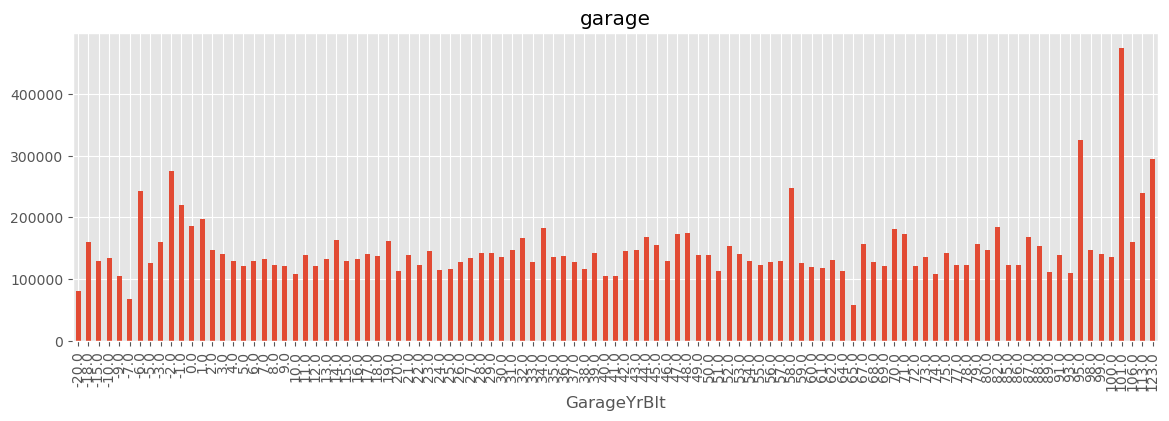

In [421]:
# for a numerical category the distance between 0 and 1895 is very large especially when they are not the cheapest house
housing.groupby(['GarageYrBlt']).SalePrice.mean().plot(kind='bar', figsize=(14,4))
plt.title('garage')
plt.show()

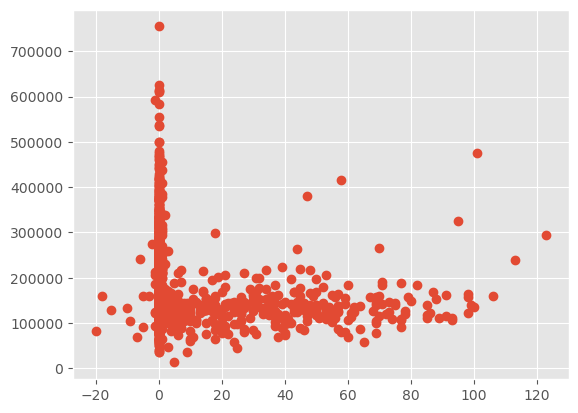

In [422]:
plt.plot(housing.GarageYrBlt, housing['SalePrice'], 'o')

In [389]:
housing.YearBuilt.loc[housing.GarageYrBlt.isnull()].max()

2007

In [390]:
print('Year Built', housing.YearBuilt.loc[housing.GarageYrBlt.isnull()].mean())
print('Mean Price', housing.SalePrice.loc[housing.GarageYrBlt.isnull()].mean())

Year Built 1943.8992248062016
Mean Price 106814.6046511628


In [391]:
years = list(range(1930, 1950))

for year in years:
    price = housing.SalePrice.loc[housing.GarageYrBlt == year].mean()
    print(year)
    print(price)

1930
131696.0
1931
161333.33333333334
1932
194500.0
1933
137500.0
1934
100833.33333333333
1935
139666.66666666666
1936
131300.0
1937
157083.33333333334
1938
111455.0
1939
145157.14285714287
1940
143132.60869565216
1941
144500.0
1942
141125.0
1943
202500.0
1944
nan
1945
116300.0
1946
123650.0
1947
129375.0
1948
131084.2105263158
1949
126942.85714285714


In [392]:
housing.GarageYrBlt.unique()

array([1939., 1984., 1930., 1940., 2001., 2003., 1974., 2007., 2005., 1993., 1920., 1963., 2002.,   nan, 1977., 2006., 1948., 1950., 1997., 2000.,
       1973., 1938., 1922., 1964., 2008., 1999., 1921., 1976., 1983., 1958., 1990., 2004., 1949., 1966., 1972., 1960., 1991., 1954., 1978., 1969.,
       1916., 1971., 1975., 1959., 1970., 1956., 1979., 1965., 1961., 1962., 1981., 1992., 1998., 1917., 1980., 1955., 1996., 1910., 1957., 1994.,
       1943., 1968., 1951., 2009., 1900., 1995., 1925., 1988., 1952., 1953., 1987., 1926., 1989., 1945., 1941., 1937., 1982., 1927., 1986., 1915.,
       1967., 1985., 1908., 1947., 1936., 1924., 1928., 1934., 2010., 1946., 1929., 1935., 1932., 1942., 1931., 1914., 1933., 1923., 1918., 1906.,
       1895.])

In [393]:
#I'm going to change the garage yr built to years after house built 
housing.GarageYrBlt.fillna(housing.YearBuilt, inplace=True)

In [253]:
housing.GarageYrBlt.unique()

array([1939., 1984., 1930., 1940., 2001., 2003., 1974., 2007., 2005., 1993., 1920., 1963., 2002., 1914., 1977., 2006., 1948., 1970., 1950., 1997.,
       2000., 1973., 1938., 1922., 1964., 2008., 1999., 1921., 1976., 1983., 1958., 1990., 1895., 2004., 1949., 1966., 1923., 1987., 1972., 1960.,
       1991., 1925., 1954., 1978., 1969., 1916., 1971., 1975., 1959., 1956., 1979., 1965., 1955., 1961., 1962., 1981., 1992., 1998., 1917., 1980.,
       1996., 1910., 1957., 1994., 1943., 1968., 1951., 2009., 1900., 1995., 1988., 1952., 1953., 1947., 1926., 1945., 1989., 1941., 1937., 1982.,
       1927., 1986., 1915., 1967., 1985., 1908., 1936., 1931., 1924., 1928., 1872., 1934., 2010., 1946., 1929., 1919., 1890., 1935., 1932., 1942.,
       1918., 1933., 1906., 1912., 1902., 1905., 1875.])

In [394]:
values = (housing['GarageYrBlt'] - housing['YearBuilt'])


In [414]:
housing.GarageYrBlt.unique()

array([  0.,  40.,  21.,   1.,   2.,  70.,  26.,  -1.,   4.,   8.,  27.,  56.,  50.,  57.,  41.,  75., 106.,   7.,   9.,   5.,  36.,  19.,  46.,
        73.,  20.,  39.,  58.,  30.,  69.,   3.,  37.,  32.,  14.,  -5., -10.,  45.,  18.,  55.,  62.,  85.,  15.,  78.,  42.,  13.,  29.,  10.,
        53.,  33.,  89.,  31.,  22.,  25.,  47.,   6.,  49.,  12.,  35.,  93.,  88.,  60.,  -7.,  28.,  -2.,  11.,  61.,  59.,  86., -20.,  17.,
        98.,  43.,  16.,  52.,  77.,  48.,  68., 123.,  34.,  54.,  99.,  44.,  64., -15.,  23.,  38.,  71.,  74.,  67.,  87., 100.,  51., 113.,
        24.,  82.,  -9.,  91., -18., 101.,  80.,  95.,  79.,  65.,  -6.,  72.,  -3.])

In [396]:
housing['GarageYrBlt'] = values
housing.GarageYrBlt.value_counts()

GarageYrBlt
 0.0      2091
 1.0        72
 2.0        24
 3.0        15
 5.0        12
          ... 
 123.0       1
 99.0        1
-15.0        1
 23.0        1
-3.0         1
Name: count, Length: 105, dtype: int64

In [256]:
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,62.472926,7890,Pave,0.0,1,...,166,0,0.0,None,None,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,0.0,1,...,0,0,0.0,None,None,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,0.0,1,...,0,0,0.0,None,None,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,0.0,1,...,111,0,0.0,None,None,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,0.0,1,...,0,0,0.0,None,None,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,70.105866,8854,Pave,0.0,1,...,40,0,0.0,None,None,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,108.318076,13680,Pave,0.0,2,...,0,0,0.0,None,None,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.000000,6270,Pave,0.0,1,...,0,0,0.0,None,None,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,69.884162,8826,Pave,0.0,1,...,0,0,0.0,None,None,0,7,2007,WD,Normal


# Outliers 

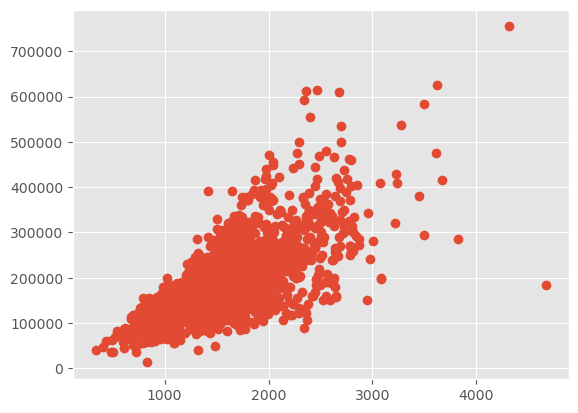

In [257]:
# there are two homes on properties that are much larger than the other 
plt.plot(housing['GrLivArea'], housing['SalePrice'], 'o')

In [258]:
# One of them not only has a very low sale price for the size but also is a partial sale so this point will be removed 
# the other large home seems to follow the trend of how a property of that price would be priced 
housing = housing.drop(309)
housing.loc[housing.GrLivArea > 4000, :]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1007,528351010,4316,755000,60,RL,104.0,21535,Pave,0.0,2,...,0,0,0.0,None,None,0,1,2007,WD,Normal


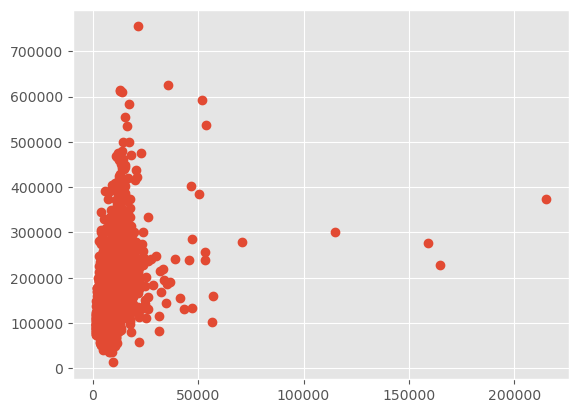

In [280]:
plt.plot(housing.LotArea, housing.SalePrice, 'o')

In [281]:
housing.loc[housing.LotArea > 100000, :]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
249,906426060,2144,277000,50,RL,1258.960097,159000,Pave,0.0,3,...,0,no,0.0,None,Shed,500,6,2007,WD,Normal
355,916176125,2036,375000,20,RL,150.000000,215245,Pave,0.0,4,...,0,no,0.0,None,None,0,6,2009,WD,Normal
1271,905301050,1824,302000,20,RL,911.748404,115149,Pave,0.0,3,...,0,no,0.0,None,None,0,6,2007,WD,Normal
1634,916125425,1786,228950,190,RL,1303.775909,164660,Grvl,0.0,2,...,0,no,0.0,None,Shed,700,8,2008,WD,Normal


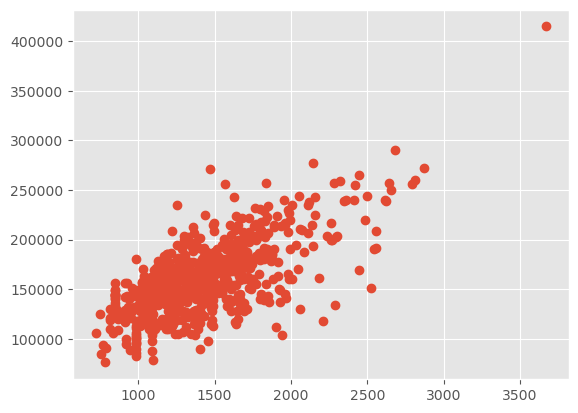

In [413]:
plt.plot(housing.loc[housing.OverallQual == 6].GrLivArea,
         housing.loc[housing.OverallQual == 6].SalePrice,
         'o')

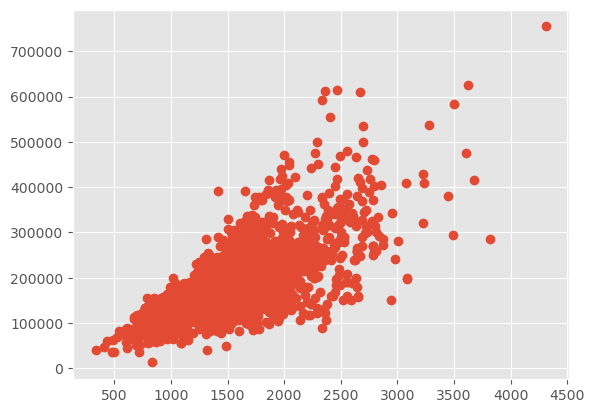

In [303]:
plt.plot(housing.GrLivArea, housing.SalePrice, 'o')

In [301]:
housing.loc[housing.SaleCondition == 'Family', :]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
78,527451410,1092,88000,160,RM,21.000000,1680,Pave,0.0,1,...,0,no,0.0,None,None,0,3,2010,WD,Family
142,534276230,1712,145000,90,RL,70.000000,8393,Pave,0.0,1,...,0,no,0.0,None,None,0,6,2006,WD,Family
180,527326040,1411,82500,20,RL,85.000000,11900,Pave,0.0,1,...,0,no,0.0,None,None,0,4,2009,WD,Family
246,911370460,1625,235000,120,RM,44.000000,4750,Pave,0.0,2,...,153,no,0.0,None,None,0,12,2007,WD,Family
256,527105140,1733,225000,60,RL,98.135544,12394,Pave,0.0,2,...,0,no,0.0,None,None,0,10,2007,WD,Family
275,533350090,2944,150000,60,RL,194.560802,24572,Pave,0.0,2,...,0,no,0.0,None,None,0,6,2008,WD,Family
282,535453180,1242,152000,20,RL,70.000000,7903,Pave,0.0,1,...,0,no,0.0,None,None,0,5,2007,WD,Family
462,527162180,1633,183000,60,RL,73.000000,11184,Pave,0.0,2,...,0,no,0.0,None,None,0,4,2008,WD,Family
504,903425270,1316,90000,50,RL,60.000000,8550,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2007,ConLw,Family
505,534127230,1740,150000,20,RL,85.000000,11050,Pave,0.0,1,...,192,no,0.0,GdWo,None,0,10,2008,WD,Family


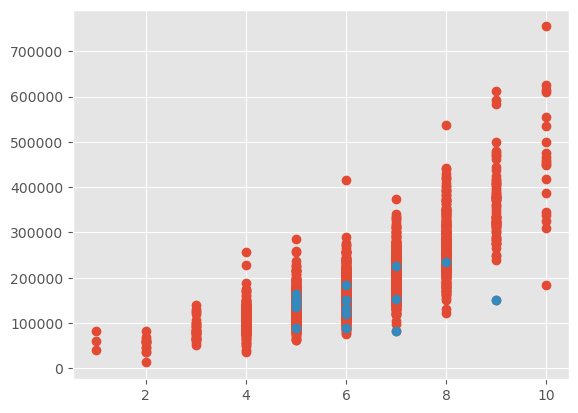

In [410]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(housing.OverallQual, housing.SalePrice, 'o')

#ax1.plot(housing.loc[housing.SaleCondition == 'Abnorml', :].OverallQual, 
 #        housing.loc[housing.SaleCondition == 'Abnorml', :].SalePrice, 'o')

#ax1.plot(housing.loc[housing.SaleCondition == 'Partial', :].OverallQual, 
  #       housing.loc[housing.SaleCondition == 'Partial', :].SalePrice, 'o')

ax1.plot(housing.loc[housing.SaleCondition == 'Family', :].OverallQual, 
         housing.loc[housing.SaleCondition == 'Family', :].SalePrice, 'o')

plt.show()

In [412]:
housing.loc[housing.SalePrice > 250000, :].loc[housing.OverallQual == 6]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
132,916326090,2279,257000,20,RL,149.000000,19958,Pave,0.0,1,...,138,no,0.0,GdPrv,None,0,7,2007,WD,Normal
165,527325070,2872,272000,60,RL,96.813240,12227,Pave,0.0,2,...,0,no,0.0,None,None,0,7,2008,WD,Normal
241,909282020,2320,259500,70,RL,61.000000,7259,Pave,0.0,2,...,0,no,0.0,MnPrv,None,0,7,2007,WD,Normal
249,906426060,2144,277000,50,RL,1258.960097,159000,Pave,0.0,3,...,0,no,0.0,None,Shed,500,6,2007,WD,Normal
353,534128190,2640,256900,60,RL,80.000000,10400,Pave,0.0,1,...,168,no,0.0,None,None,0,5,2009,WD,Normal
388,905427030,3672,415000,75,RL,60.000000,19800,Pave,0.0,1,...,0,no,0.0,None,None,0,12,2006,WD,Normal
605,528480090,1468,271500,20,FV,84.000000,10440,Pave,0.0,1,...,216,no,0.0,None,None,0,5,2010,WD,Normal
1001,909425140,1839,257500,20,RL,110.000000,14442,Pave,0.0,1,...,200,no,0.0,None,None,0,6,2007,WD,Normal
1009,905401020,2422,255000,20,RL,102.000000,12671,Pave,0.0,2,...,144,no,0.0,None,None,0,7,2007,WD,Normal
1372,533125080,2683,290000,60,RL,72.885080,9205,Pave,0.0,2,...,196,no,0.0,None,None,0,6,2008,WD,Normal


In [405]:
housing.loc[housing.OverallQual == 10,:].loc[housing.SalePrice < 400000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
309,908154205,4676,184750,60,RL,130.0,40094,Pave,0.0,2,...,0,no,0.0,None,None,0,10,2007,New,Partial
666,528477050,2007,310000,60,FV,85.0,11003,Pave,0.0,1,...,0,no,0.0,None,None,0,4,2009,WD,Normal
942,528166060,2392,386250,20,RL,103.0,13472,Pave,0.0,1,...,0,no,0.0,None,None,0,6,2009,WD,Normal
2135,533236090,2393,345000,160,FV,36.0,3951,Pave,2.0,2,...,94,no,0.0,None,None,0,2,2008,WD,Normal
2168,902401120,2775,325000,75,RM,75.0,13500,Pave,0.0,1,...,0,no,0.0,None,None,0,7,2008,WD,Normal
2514,528102040,1718,337500,20,RL,96.0,12456,Pave,0.0,1,...,0,no,0.0,None,None,0,7,2009,WD,Normal


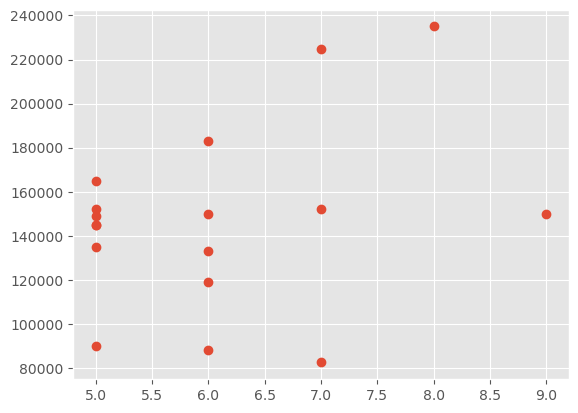

In [318]:
plt.plot(housing.loc[housing.SaleCondition == 'Family', :].OverallQual, 
         housing.loc[housing.SaleCondition == 'Family', :].SalePrice, 'o')

In [293]:
housing.loc[housing.SaleCondition != 'Normal',:].loc[housing.GrLivArea > 2500,:]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
50,909176170,2592,150000,90,RL,60.000000,10890,Pave,0.0,1,...,0,no,0.0,None,Shed,1512,1,2007,WD,AdjLand
63,528118030,2748,390000,60,RL,108.000000,13418,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2008,WD,Abnorml
235,906204180,2559,209000,60,RL,88.000000,12128,Pave,0.0,2,...,168,no,0.0,MnPrv,None,0,11,2006,WD,Abnorml
275,533350090,2944,150000,60,RL,194.560802,24572,Pave,0.0,2,...,0,no,0.0,None,None,0,6,2008,WD,Family
277,527212040,2576,361919,60,RL,82.000000,12438,Pave,0.0,2,...,0,no,0.0,None,None,0,7,2006,New,Partial
290,528110040,2552,479069,20,RL,107.000000,13891,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2007,New,Partial
407,527214060,2698,535000,60,RL,82.000000,16052,Pave,0.0,2,...,0,no,0.0,None,None,0,7,2006,New,Partial
423,528108040,2690,398800,60,RL,95.000000,12350,Pave,0.0,1,...,0,no,0.0,None,None,0,7,2009,New,Partial
489,528170040,2728,437154,60,RL,56.000000,20431,Pave,0.0,3,...,0,no,0.0,None,None,0,4,2006,New,Partial
784,528106010,2596,342643,60,RL,111.000000,16259,Pave,0.0,1,...,0,no,0.0,None,None,0,9,2006,New,Partial


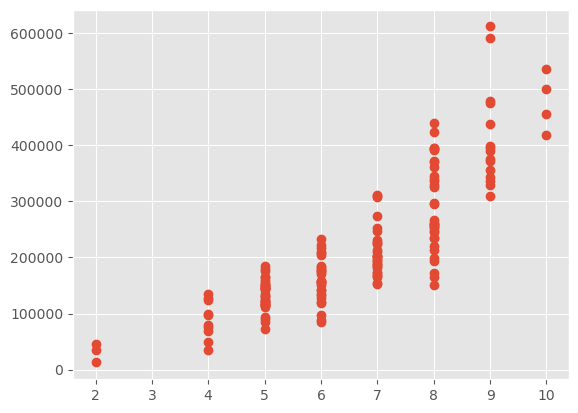

In [364]:
plt.plot(housing.loc[housing.SaleCondition != 'Normal', :].OverallQual, housing.loc[housing.SaleCondition != 'Normal', :].SalePrice, 'o')

In [425]:
import plotly.express as px
fig = px.box(housing, x= 'SaleCondition', y="SalePrice", points="all")
fig.show()

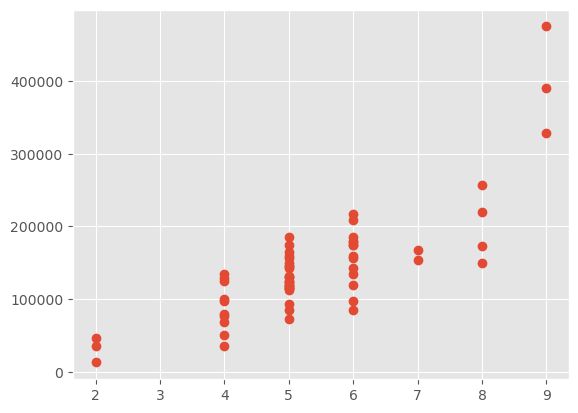

In [367]:
plt.plot(housing.loc[housing.SaleCondition == 'Abnorml', :].OverallQual, housing.loc[housing.SaleCondition == 'Abnorml', :].SalePrice, 'o')

In [325]:
fig = px.box(housing, y="SalePrice", points="all")
fig.show()

In [1]:
fig = px.box(housing, x = "OverallQual", y="SalePrice", points="all")
fig.show()

NameError: name 'px' is not defined

In [345]:
fig = px.box(housing, y="GrLivArea", points="all")
fig.show()

In [352]:
# 6,7,5
housing.loc[housing.SaleCondition == "Family",:].loc[housing.SalePrice < 100000, :]
# the one with PID 527326040 is an outlier for a home of quality 7 and is a family sale 


In [ ]:
housing = housing.drop(180)

In [327]:
# PID 533350090 is priced very low for a home of quality 9 and is a family sale 
housing.loc[housing.OverallQual == 9,:].sort_values(by=['SalePrice'])

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
275,533350090,2944,150000,60,RL,194.560802,24572,Pave,0.0,2,...,0,no,0.0,None,None,0,6,2008,WD,Family
1826,906380100,1800,239000,20,RL,122.000000,11923,Pave,0.0,2,...,0,no,0.0,None,None,0,5,2009,WD,Normal
2211,528180130,1456,248500,120,RL,48.000000,6472,Pave,0.0,1,...,0,no,0.0,None,None,0,4,2009,WD,Normal
1537,528458140,1530,250000,20,FV,112.000000,12606,Pave,0.0,2,...,0,no,0.0,None,None,0,5,2009,WD,Normal
2046,528186080,1684,266000,120,RL,63.000000,8849,Pave,0.0,2,...,0,no,0.0,None,None,0,7,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,528110040,2552,479069,20,RL,107.000000,13891,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2007,New,Partial
214,528176010,2696,500000,20,RL,110.000000,14300,Pave,0.0,1,...,0,no,0.0,None,None,0,6,2010,WD,Normal
2088,528360050,3500,584500,60,RL,114.000000,17242,Pave,0.0,2,...,210,no,0.0,None,None,0,5,2006,WD,Normal
615,527216080,2338,591587,20,RL,52.000000,51974,Pave,0.0,2,...,322,no,0.0,None,None,0,6,2007,New,Partial


In [353]:
housing = housing.drop(275)

In [354]:
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,62.472926,7890,Pave,0.0,1,...,166,no,0.0,None,None,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,42.000000,4235,Pave,0.0,1,...,0,no,0.0,None,None,0,2,2009,WD,Normal
2,911128020,1001,124900,30,C (all),60.000000,6060,Pave,0.0,1,...,0,no,0.0,None,None,0,11,2007,WD,Normal
3,535377150,1039,114000,70,RL,80.000000,8146,Pave,0.0,1,...,111,no,0.0,None,None,0,5,2009,WD,Normal
4,534177230,1665,227000,60,RL,70.000000,8400,Pave,0.0,1,...,0,no,0.0,None,None,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,70.105866,8854,Pave,0.0,1,...,40,no,0.0,None,None,0,5,2009,WD,Normal
2576,905402060,1733,139600,20,RL,108.318076,13680,Pave,0.0,2,...,0,no,0.0,None,None,0,6,2009,WD,Normal
2577,909275030,2002,145000,90,RH,82.000000,6270,Pave,0.0,1,...,0,no,0.0,None,None,0,8,2007,WD,Normal
2578,907192040,1842,217500,60,RL,69.884162,8826,Pave,0.0,1,...,0,no,0.0,None,None,0,7,2007,WD,Normal


In [347]:
# this one we will leave in because is it significantly larger than the other homes with this quality 
housing.loc[housing.OverallQual ==6, :].sort_values(by = ["GrLivArea"], ascending=False)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
388,905427030,3672,415000,75,RL,60.000000,19800,Pave,0.0,1,...,0,no,0.0,None,None,0,12,2006,WD,Normal
165,527325070,2872,272000,60,RL,96.813240,12227,Pave,0.0,2,...,0,no,0.0,None,None,0,7,2008,WD,Normal
1791,906204280,2814,260000,60,RL,77.366661,9771,Pave,0.0,4,...,216,no,0.0,GdPrv,None,0,6,2008,WD,Normal
2436,902105020,2792,256000,50,RM,60.000000,10440,Pave,1.0,1,...,480,no,0.0,MnPrv,Shed,1150,6,2008,WD,Normal
1372,533125080,2683,290000,60,RL,72.885080,9205,Pave,0.0,2,...,196,no,0.0,None,None,0,6,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,531479020,784,76000,45,RH,60.000000,9000,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2009,WD,Normal
938,903452025,768,93850,30,RM,49.812063,6291,Grvl,0.0,2,...,0,no,0.0,None,None,0,7,2008,WD,Normal
1937,903456090,754,84500,190,RM,60.000000,6780,Pave,0.0,1,...,0,no,0.0,None,None,0,6,2006,WD,Normal
2293,531452050,752,125000,120,RL,50.000000,7175,Pave,0.0,1,...,90,no,0.0,MnPrv,None,0,2,2010,WD,Normal


In [351]:
housing.loc[housing.SaleCondition == 'Abnorml', :].sort_values(by = ["OverallQual"], ascending=False)
# most expensive house is not an outlier within a house  of 9 quality 

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
124,906412010,2276,475000,20,RL,91.0,11778,Pave,0.0,1,...,255,no,0.0,None,None,0,6,2008,WD,Abnorml
485,533215080,1709,328900,120,FV,50.0,5119,Pave,0.0,2,...,0,no,0.0,None,None,0,1,2008,CWD,Abnorml
63,528118030,2748,390000,60,RL,108.0,13418,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2008,WD,Abnorml
111,533236050,1739,172500,160,FV,24.0,2645,Pave,2.0,1,...,0,no,0.0,None,None,0,8,2009,WD,Abnorml
143,906420020,1915,220000,60,RL,80.0,10041,Pave,0.0,2,...,0,no,0.0,None,None,0,2,2006,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,527425060,864,97000,20,RL,70.0,10500,Pave,0.0,1,...,0,no,0.0,None,None,0,3,2009,WD,Abnorml
608,908275290,1482,125000,20,RL,60.0,16012,Pave,0.0,2,...,0,no,0.0,MnPrv,None,0,10,2006,WD,Abnorml
644,911175430,480,35311,20,C (all),50.0,9000,Pave,0.0,1,...,0,no,0.0,None,None,0,10,2006,WD,Abnorml
427,902207130,832,12789,30,RM,68.0,9656,Pave,0.0,1,...,0,no,0.0,None,None,0,6,2010,WD,Abnorml


# Pool

In [397]:
housing.PoolArea.value_counts()


PoolArea
0      2570
144       1
800       1
519       1
444       1
648       1
228       1
561       1
576       1
368       1
Name: count, dtype: int64

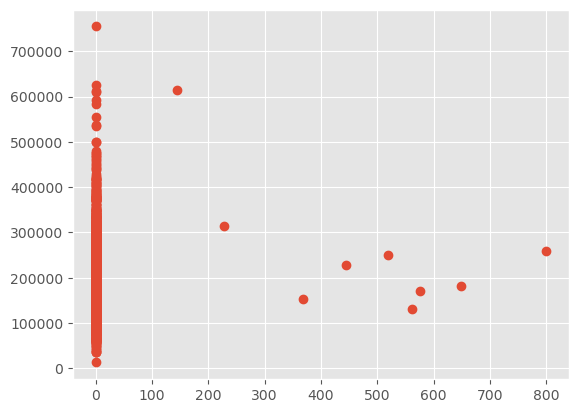

In [398]:
# most houses do not have a pool and the pool area does not correlate well with sale price 
plt.plot(housing['PoolArea'], housing['SalePrice'], 'o')

In [399]:
f = lambda x: 'yes' if x>0 else 'no'
housing.PoolArea = housing.PoolArea.map(f)

In [400]:
housing.PoolArea = housing.PoolArea.apply(lambda x: str(x))

In [401]:
housing.PoolArea

0       no
1       no
2       no
3       no
4       no
        ..
2575    no
2576    no
2577    no
2578    no
2579    no
Name: PoolArea, Length: 2579, dtype: object

In [402]:
housing.to_csv('housing_pp2.csv')